In [3]:
!pip install tensorflow

Found 36658 images belonging to 3 classes.
Epoch 1/10


C:\Users\82106\AppData\Local\Temp\ipykernel_23896\3067100773.py:66: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  epoch_hist = model.fit_generator(


150/150 [==============================] - 196s 1s/step - loss: -15.9653 - accuracy: 0.3373
Epoch 2/10
150/150 [==============================] - 196s 1s/step - loss: -55.1242 - accuracy: 0.3453
Epoch 3/10
150/150 [==============================] - 190s 1s/step - loss: -93.0192 - accuracy: 0.3223
Epoch 4/10
150/150 [==============================] - 192s 1s/step - loss: -121.2400 - accuracy: 0.3387
Epoch 5/10
150/150 [==============================] - 192s 1s/step - loss: -147.7965 - accuracy: 0.3247
Epoch 6/10
150/150 [==============================] - 191s 1s/step - loss: -204.1197 - accuracy: 0.3363
Epoch 7/10
150/150 [==============================] - 191s 1s/step - loss: -238.3250 - accuracy: 0.3360
Epoch 8/10
150/150 [==============================] - 191s 1s/step - loss: -254.3925 - accuracy: 0.3590
Epoch 9/10
150/150 [==============================] - 192s 1s/step - loss: -282.0953 - accuracy: 0.3347
Epoch 10/10
150/150 [==============================] - 192s 1s/step - loss: -3

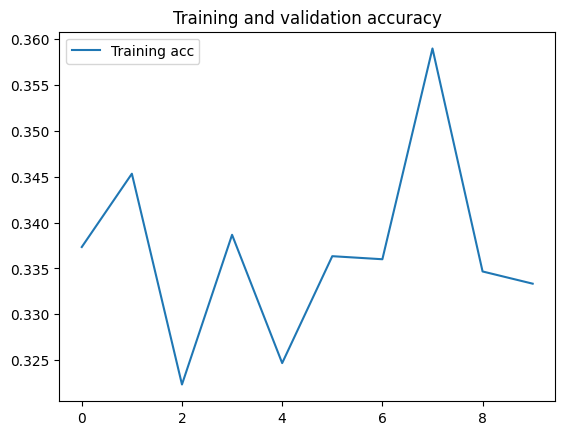

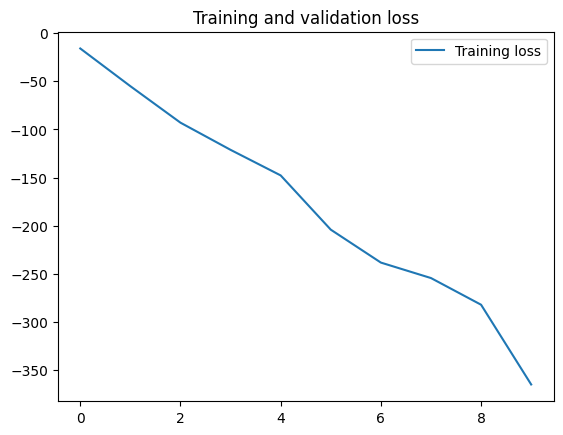

In [34]:
import os, shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# 소규모 데이터셋을 저장할 디렉터리
base_dir = './Data/Apple_one/'

# 훈련, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')


test_dir = os.path.join(base_dir, 'test')


conv_base = VGG16(weights='imagenet',         # 초기화할 가중치 종류
      include_top = False,        # FNN중 사용하지 않고 내가 재구성 할 것임
      input_shape = (150,150,3))  

conv_base.trainable = False # 컨브넷 영결 , 훈련이 적용되지 않음


# 훈련용 제너레이터
train_datagen = ImageDataGenerator(
    rescale=1./255,    #전처리
    rotation_range=40, # 랜덤하게 사진을 회전시킬 각도 범위(0~180)
    width_shift_range=0.2, #사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위
    height_shift_range=0.2,
    shear_range=0.2, #랜덤하게 전단 변환을 적용할 각도 범위
    zoom_range=0.2,   #랜덤하게 사진을 확대할 범위
    horizontal_flip=True, #랜덤하게 이미지를 수평으로 뒤집기
    fill_mode='nearest') #회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략


train_generator = train_datagen.flow_from_directory(
    train_dir , #타깃 디렉토리
    target_size=(150,150), #모든 이미지의 크기를 150x150로 변경
    batch_size=20, #하드 드라이브에서 몇 장의 이미지를 메모리에 올릴건지(훈련용으로)
    class_mode='binary' # 이진분류의 목적이므로 자동으로 train_dir아래에 두가지의 폴더를 기준으로 라벨링처리
    )

model = Sequential()

# 사전학습 모델 추가

model.add(conv_base)

#FNN층 구성

model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Flatten())
# # model.add(Dropout(0.3))
# # model.add(Dense(len(train_dir),activation='relu'))
model.add(Dense(1,activation='sigmoid')) #softmax ->다중분류

model.compile(loss='binary_crossentropy', #categorical_crossentropy
              optimizer='adam',
              metrics=['accuracy']  
                )

epoch_hist = model.fit_generator(
                train_generator, 
                steps_per_epoch=150, #에포크당 150step으로
                epochs=10, #에포크 10회
                validation_steps = 50,
                verbose = 1
)

acc = epoch_hist.history['accuracy']
loss = epoch_hist.history['loss']

plt.plot(acc, label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.save('./model/VGG16_side.h5')

Found 36658 images belonging to 3 classes.


C:\Users\82106\AppData\Local\Temp\ipykernel_23896\1341556061.py:74: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  epoch_hist = model.fit_generator(


Epoch 1/10
150/150 [==============================] - 433s 3s/step - loss: 0.7811 - accuracy: 0.7230
Epoch 2/10
150/150 [==============================] - 438s 3s/step - loss: 0.4370 - accuracy: 0.8267
Epoch 3/10
150/150 [==============================] - 430s 3s/step - loss: 0.3617 - accuracy: 0.8523
Epoch 4/10
150/150 [==============================] - 429s 3s/step - loss: 0.3240 - accuracy: 0.8740
Epoch 5/10
150/150 [==============================] - 429s 3s/step - loss: 0.2910 - accuracy: 0.8817
Epoch 6/10
150/150 [==============================] - 435s 3s/step - loss: 0.2919 - accuracy: 0.8873
Epoch 7/10
150/150 [==============================] - 433s 3s/step - loss: 0.2781 - accuracy: 0.8947
Epoch 8/10
150/150 [==============================] - 427s 3s/step - loss: 0.2694 - accuracy: 0.8930
Epoch 9/10
150/150 [==============================] - 419s 3s/step - loss: 0.2711 - accuracy: 0.8953
Epoch 10/10
150/150 [==============================] - 421s 3s/step - loss: 0.2322 - accura

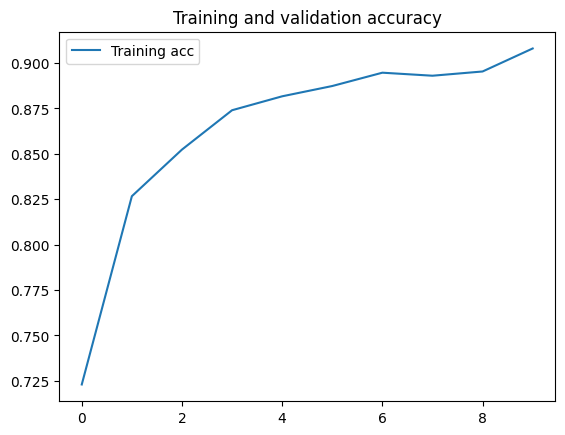

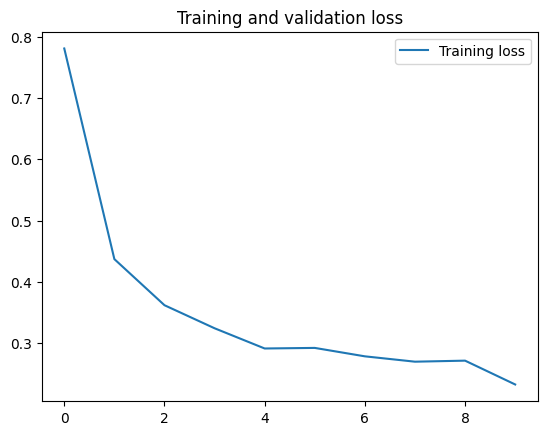

In [40]:
import os, shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import layers
from keras import optimizers

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './Data/Apple_one/'

# 훈련, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')


test_dir = os.path.join(base_dir, 'test')


conv_base = VGG16(weights='imagenet', 
                    include_top=False, 
                    input_shape=(224, 224, 3)) 

conv_base.trainable = False # 컨브넷 영결 , 훈련이 적용되지 않음


# 훈련용 제너레이터
train_datagen = ImageDataGenerator(
    rescale=1./255,    #전처리
    rotation_range=40, # 랜덤하게 사진을 회전시킬 각도 범위(0~180)
    width_shift_range=0.2, #사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위
    height_shift_range=0.2,
    shear_range=0.2, #랜덤하게 전단 변환을 적용할 각도 범위
    zoom_range=0.2,   #랜덤하게 사진을 확대할 범위
    horizontal_flip=True, #랜덤하게 이미지를 수평으로 뒤집기
    fill_mode='nearest') #회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략


train_generator = train_datagen.flow_from_directory(
    train_dir , #타깃 디렉토리
    target_size=(224,224), #모든 이미지의 크기를 244X244 으로 변경#? --수정--
    batch_size=20, #하드 드라이브에서 몇 장의 이미지를 메모리에 올릴건지(훈련용으로)
    class_mode='categorical') #다중 분류이기에 categorical#? --수정--

model = Sequential()

# 사전학습 모델 추가

model.add(conv_base)

#FNN층 구성
#? --수정--
model.add(layers.Flatten()) #Flatten 시킨다 -> 1차원 평탄화
model.add(layers.Dense(1024, activation='relu'))  # Dense넷을 넣어준다 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax')) #마지막 layer의 노드수는 3개이다.(class가 3개이기 떄문), 다중분류

model.compile(loss='categorical_crossentropy', #다중 분류
              optimizer=optimizers.RMSprop(lr=1e-4), #그리에이트 디센트정하는 부분이 RMSprop이고 lr은 learning rate를 의미
                                                     #폭이 너무 큰거 같으면 optimizer=optimizers.RMSprop(lr=1e-4), 부분에서 learning rate를 더 낮추면 된다.
              metrics=['accuracy']  
                )
#? --수정--

epoch_hist = model.fit_generator(
                train_generator, 
                steps_per_epoch=150, #에포크당 150step으로
                epochs=10, #에포크 10회
                validation_steps = 50,
                verbose = 1
)

acc = epoch_hist.history['accuracy']
loss = epoch_hist.history['loss']

plt.plot(acc, label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.save('./model/VGG16_side.h5')

In [2]:
import os, shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import layers
from keras import optimizers
import os, glob, numpy as np

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './Data/Apple_one/'

# 훈련, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')


test_dir = os.path.join(base_dir, 'test')


conv_base = VGG16(weights='imagenet', 
                    include_top=False, 
                    input_shape=(224, 224, 3)) 

conv_base.trainable = False # 컨브넷 영결 , 훈련이 적용되지 않음


# 훈련용 제너레이터
train_datagen = ImageDataGenerator(
    rescale=1./255,    #전처리
    rotation_range=40, # 랜덤하게 사진을 회전시킬 각도 범위(0~180)
    width_shift_range=0.2, #사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위
    height_shift_range=0.2,
    shear_range=0.2, #랜덤하게 전단 변환을 적용할 각도 범위
    zoom_range=0.2,   #랜덤하게 사진을 확대할 범위
    horizontal_flip=True, #랜덤하게 이미지를 수평으로 뒤집기
    fill_mode='nearest') #회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략


train_generator = train_datagen.flow_from_directory(
    train_dir , #타깃 디렉토리
    target_size=(224,224), #모든 이미지의 크기를 244X244 으로 변경#? --수정--
    batch_size=20, #하드 드라이브에서 몇 장의 이미지를 메모리에 올릴건지(훈련용으로)
    class_mode='categorical') #다중 분류이기에 categorical#? --수정--

model = Sequential()

# 사전학습 모델 추가

model.add(conv_base)

#FNN층 구성
#? --수정--
model.add(layers.Flatten()) #Flatten 시킨다 -> 1차원 평탄화
model.add(layers.Dense(1024, activation='relu'))  # Dense넷을 넣어준다 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax')) #마지막 layer의 노드수는 3개이다.(class가 3개이기 떄문), 다중분류

model.compile(loss='categorical_crossentropy', #다중 분류
              optimizer=optimizers.RMSprop(lr=1e-4), #그리에이트 디센트정하는 부분이 RMSprop이고 lr은 learning rate를 의미
                                                     #폭이 너무 큰거 같으면 optimizer=optimizers.RMSprop(lr=1e-4), 부분에서 learning rate를 더 낮추면 된다.
              metrics=['accuracy']  
                )
#? --수정--

epoch_hist = model.fit_generator(
                train_generator, 
                steps_per_epoch=150, #에포크당 150step으로
                epochs=10, #에포크 10회
                validation_steps = 50,
                verbose = 1
)

y_vloss = epoch_hist.history['val_loss']
y_loss = epoch_hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

Found 36658 images belonging to 3 classes.


c:\Python39\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\82106\AppData\Local\Temp\ipykernel_24772\3796736597.py:67: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  epoch_hist = model.fit_generator(


Epoch 1/10
150/150 [==============================] - 420s 3s/step - loss: 0.8011 - accuracy: 0.7330
Epoch 2/10
150/150 [==============================] - 419s 3s/step - loss: 0.4320 - accuracy: 0.8257
Epoch 3/10
150/150 [==============================] - 420s 3s/step - loss: 0.3721 - accuracy: 0.8587
Epoch 4/10
150/150 [==============================] - 421s 3s/step - loss: 0.3220 - accuracy: 0.8710
Epoch 5/10
150/150 [==============================] - 424s 3s/step - loss: 0.2813 - accuracy: 0.8903
Epoch 6/10
150/150 [==============================] - 422s 3s/step - loss: 0.2941 - accuracy: 0.8810
Epoch 7/10
150/150 [==============================] - 423s 3s/step - loss: 0.2875 - accuracy: 0.8927
Epoch 8/10
150/150 [==============================] - 426s 3s/step - loss: 0.2772 - accuracy: 0.9010
Epoch 9/10
150/150 [==============================] - 421s 3s/step - loss: 0.2601 - accuracy: 0.9037
Epoch 10/10
150/150 [==============================] - 414s 3s/step - loss: 0.2533 - accura

KeyError: 'val_loss'

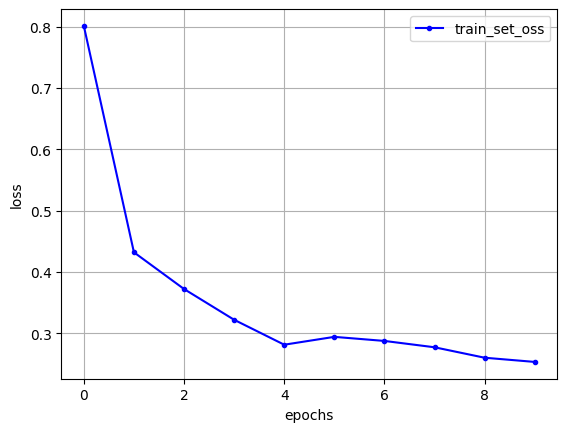

In [5]:
# y_vloss = epoch_hist.history['val_loss']
y_loss = epoch_hist.history['loss']

x_len = np.arange(len(y_loss))

# plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [1]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import models

model = load_model('./Model/Vgg16_Apple_one.h5')

KeyboardInterrupt: 